In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
import pandas as pd

data = pd.read_csv('/gdrive/MyDrive/nor_constant_c.csv')

X = data.iloc[:, :-1]  # 마지막 열을 제외한 모든 열
y = data.iloc[:, -1]   # 마지막 열

In [ ]:
from sklearn.svm import SVC

# 선형 SVM 학습
model = SVC(kernel='linear')
model.fit(X, y)

# Feature Importance 추출
importance = model.coef_[0]

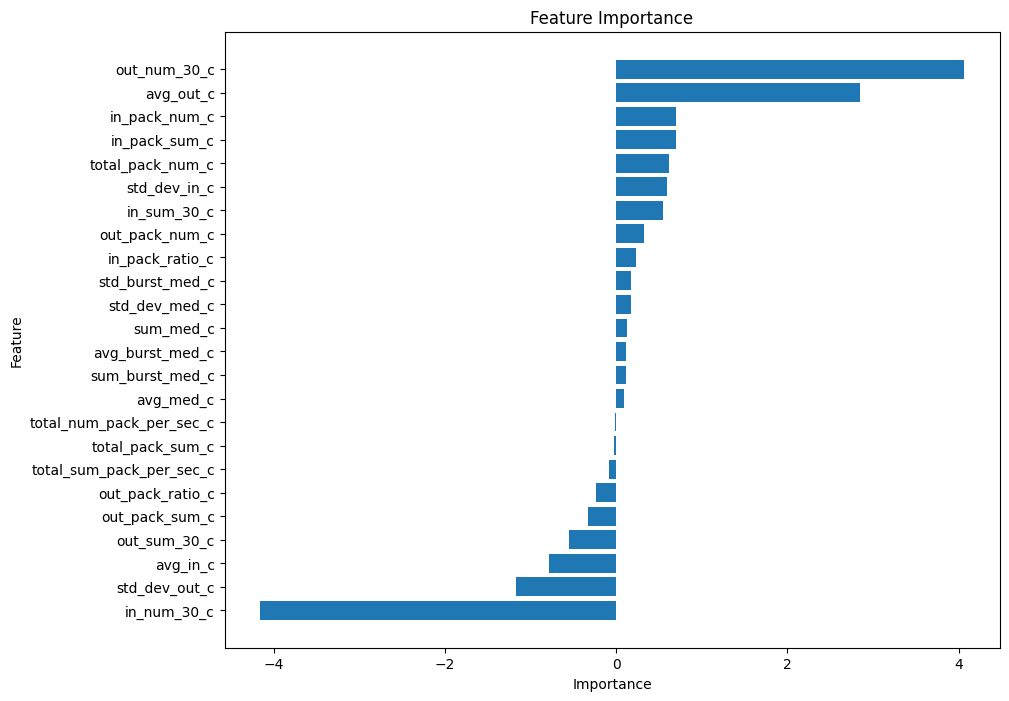

In [ ]:
import matplotlib.pyplot as plt

feature_importance = dict(zip(data.columns[:-1], importance))

sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

features, scores = zip(*sorted_importance)

plt.figure(figsize=(10, 8))
plt.barh(features, scores)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # 가장 중요한 feature가 위로 오도록
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_selected = SVC(kernel='linear')
model_selected.fit(X_train, y_train)

scores = cross_val_score(model_selected, X_train, y_train, cv=5)
print("1. Whole Features")
print("Cross Validation Score : ", scores.mean())

1. Whole Features
Cross Validation Score :  0.29270676691729325


In [ ]:
threshold = 0
selected_features = [f for f, imp in zip(data.columns[:-1], importance) if imp > threshold]

X_selected = data[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

model_selected = SVC(kernel='linear')
model_selected.fit(X_train, y_train)

scores = cross_val_score(model_selected, X_train, y_train, cv=5)
print("2. Importance Threshold 0 Features")
print("Cross Validation Score : ", scores.mean())

2. Importance Threshold 0 Features
Cross Validation Score :  0.24067669172932332
